In [57]:
import pandas as pd
import seaborn as sns
import xgboost as xgb
import joblib

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/classificacao_xgboost/main/Dados/doenca_cardiaca.csv')
df.head()

,Idade,Sexo,Tipo dor,Pressao arterial,Colesterol,Glicemia jejum >120,Resultados ECG,Frequencia cardiaca max,Dor exercicio,Depressao ST,Inclinacao ST,Numero vasos fluro,Teste cintilografia,Doenca cardiaca
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presenca
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Ausencia
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presenca
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Ausencia
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Ausencia


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Idade                    270 non-null    int64  
 1   Sexo                     270 non-null    int64  
 2   Tipo dor                 270 non-null    int64  
 3   Pressao arterial         270 non-null    int64  
 4   Colesterol               270 non-null    int64  
 5   Glicemia jejum >120      270 non-null    int64  
 6   Resultados ECG           270 non-null    int64  
 7   Frequencia cardiaca max  270 non-null    int64  
 8   Dor exercicio            270 non-null    int64  
 9   Depressao ST             270 non-null    float64
 10  Inclinacao ST            270 non-null    int64  
 11  Numero vasos fluro       270 non-null    int64  
 12  Teste cintilografia      270 non-null    int64  
 13  Doenca cardiaca          270 non-null    int64  
dtypes: float64(1), int64(13)
m

In [4]:
df.describe()

,Idade,Sexo,Tipo dor,Pressao arterial,Colesterol,Glicemia jejum >120,Resultados ECG,Frequencia cardiaca max,Dor exercicio,Depressao ST,Inclinacao ST,Numero vasos fluro,Teste cintilografia
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


# 1. EDA

<Axes: xlabel='Doenca cardiaca', ylabel='Idade'>

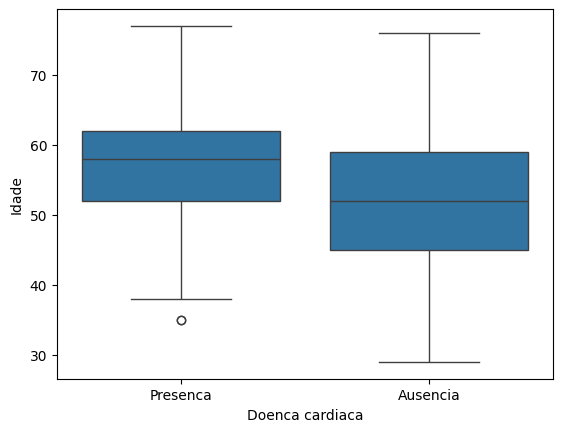

In [5]:
sns.boxplot(df, x='Doenca cardiaca', y='Idade')

<Axes: xlabel='Sexo', ylabel='count'>

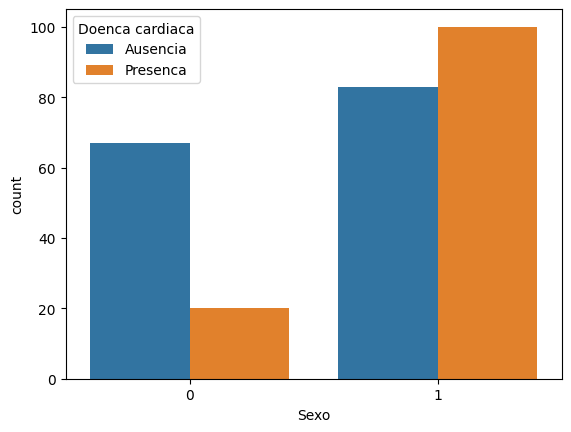

In [6]:
sns.countplot(df, x='Sexo', hue='Doenca cardiaca')

<Axes: xlabel='Tipo dor', ylabel='count'>

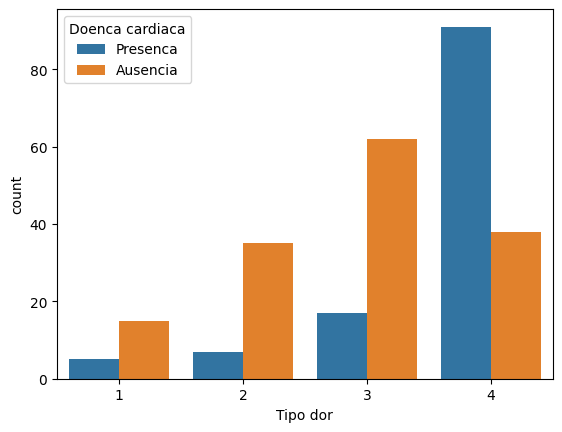

In [7]:
sns.countplot(df, x='Tipo dor', hue='Doenca cardiaca')

In [8]:
df['Doenca cardiaca'].value_counts()

Doenca cardiaca
Ausencia    150
Presenca    120
Name: count, dtype: int64

In [9]:
df['Doenca cardiaca'] = df['Doenca cardiaca'].map({'Presenca': 1, 'Ausencia': 0})
df.head()

,Idade,Sexo,Tipo dor,Pressao arterial,Colesterol,Glicemia jejum >120,Resultados ECG,Frequencia cardiaca max,Dor exercicio,Depressao ST,Inclinacao ST,Numero vasos fluro,Teste cintilografia,Doenca cardiaca
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


# 2. Starting classification

In [10]:
x = df.drop(columns='Doenca cardiaca')
y = df['Doenca cardiaca']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=42)

## Decision Tree

In [12]:
dt = DecisionTreeClassifier(random_state=42)

In [13]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [14]:
dt.score(x_test, y_test)

0.7205882352941176

In [15]:
y_preds = dt.predict(x_test)

In [16]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.68      0.73        38
           1       0.66      0.77      0.71        30

    accuracy                           0.72        68
   macro avg       0.72      0.73      0.72        68
weighted avg       0.73      0.72      0.72        68



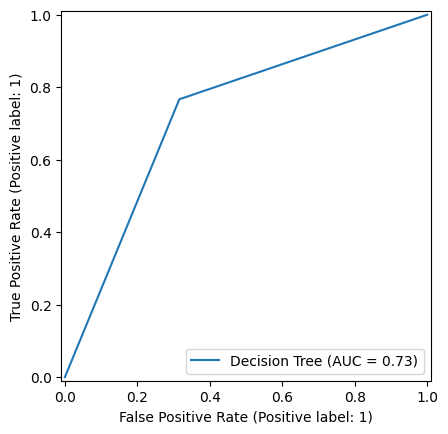

In [17]:
RocCurveDisplay.from_predictions(y_test, y_preds, name='Decision Tree')

## XGBoost

In [18]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic')
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [19]:
y_pred_xgb = xgb_model.predict(x_test)

In [20]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86        38
           1       0.81      0.87      0.84        30

    accuracy                           0.85        68
   macro avg       0.85      0.85      0.85        68
weighted avg       0.86      0.85      0.85        68



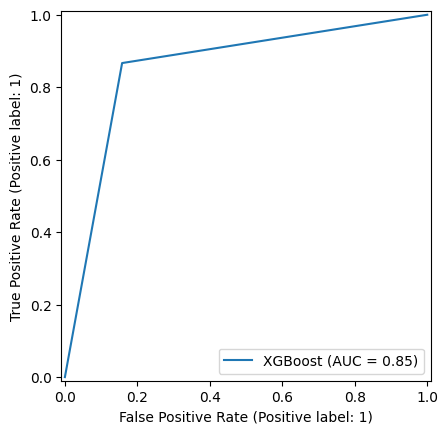

In [21]:
RocCurveDisplay.from_predictions(y_test, y_pred_xgb, name='XGBoost')

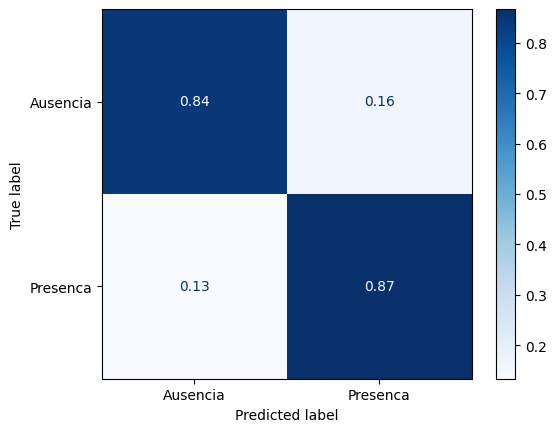

In [22]:
ConfusionMatrixDisplay.from_estimator(xgb_model, x_test, y_test, display_labels=['Ausencia', 'Presenca'],
                                      normalize='true', cmap='Blues');

# 3. Cross validation

In [23]:
dmatrix = xgb.DMatrix(data=x, label=y)

In [24]:
params = {'objective': 'binary:logistic'}

cv_results = xgb.cv(dtrain=dmatrix, params=params, nfold=3, num_boost_round=50, metrics='error',
                    as_pandas=True, seed=42)

print(cv_results)
print(1 - cv_results['test-error-mean'].iloc[-1])

    train-error-mean  train-error-std  test-error-mean  test-error-std
0           0.118519         0.005238         0.225926        0.041903
1           0.088889         0.016355         0.211111        0.039545
2           0.075926         0.013858         0.200000        0.024003
3           0.061111         0.013608         0.174074        0.013858
4           0.042593         0.002619         0.174074        0.022831
5           0.038889         0.009072         0.181481        0.013858
6           0.033333         0.009072         0.174074        0.027716
7           0.025926         0.006929         0.177778        0.027217
8           0.022222         0.004536         0.177778        0.015713
9           0.020370         0.005238         0.188889        0.027217
10          0.012963         0.006929         0.185185        0.022831
11          0.009259         0.002619         0.196296        0.020951
12          0.005556         0.004536         0.185185        0.018885
13    

In [25]:
params = {'objective': 'binary:logistic'}

cv_results = xgb.cv(dtrain=dmatrix, params=params, nfold=3, num_boost_round=2024,
                    early_stopping_rounds=5, metrics='error', as_pandas=True, seed=42)

print(cv_results)
print(1 - cv_results['test-error-mean'].iloc[-1])

   train-error-mean  train-error-std  test-error-mean  test-error-std
0          0.118519         0.005238         0.225926        0.041903
1          0.088889         0.016355         0.211111        0.039545
2          0.075926         0.013858         0.200000        0.024003
3          0.061111         0.013608         0.174074        0.013858
4          0.042593         0.002619         0.174074        0.022831
0.825925925925926


# 4. Hyperparameters

In [26]:
params = {'objective': 'binary:logistic',
          'colsample_bytree': 0.3,
          'learning_rate': 0.1,
          'max_depth': 5}

cv_results = xgb.cv(dtrain=dmatrix, params=params, nfold=3, num_boost_round=2024,
                    early_stopping_rounds=5, metrics='error', as_pandas=True, seed=42)

print(cv_results)
print(1 - cv_results['test-error-mean'].iloc[-1])

    train-error-mean  train-error-std  test-error-mean  test-error-std
0           0.390741         0.061753         0.400000        0.098131
1           0.270370         0.026189         0.288889        0.050512
2           0.196296         0.039109         0.251852        0.073330
3           0.179630         0.017173         0.233333        0.062854
4           0.150000         0.004536         0.225926        0.068092
5           0.129630         0.020454         0.218519        0.073330
6           0.105556         0.020787         0.207407        0.049966
7           0.101852         0.010476         0.196296        0.041903
8           0.088889         0.015713         0.192593        0.046555
9           0.088889         0.007857         0.196296        0.049966
10          0.081481         0.013858         0.188889        0.041574
11          0.075926         0.009443         0.188889        0.027217
12          0.064815         0.002619         0.196296        0.031860
13    

In [27]:
params = {'objective': 'binary:logistic',
          'colsample_bytree': 0.3,
          'learning_rate': 0.1,
          'max_depth': 5}

cv_results = xgb.cv(dtrain=dmatrix, params=params, nfold=3, num_boost_round=2024,
                    early_stopping_rounds=5, metrics='error', as_pandas=True, seed=42)

print(cv_results)
print(1 - cv_results['test-error-mean'].iloc[-1])

    train-error-mean  train-error-std  test-error-mean  test-error-std
0           0.390741         0.061753         0.400000        0.098131
1           0.270370         0.026189         0.288889        0.050512
2           0.196296         0.039109         0.251852        0.073330
3           0.179630         0.017173         0.233333        0.062854
4           0.150000         0.004536         0.225926        0.068092
5           0.129630         0.020454         0.218519        0.073330
6           0.105556         0.020787         0.207407        0.049966
7           0.101852         0.010476         0.196296        0.041903
8           0.088889         0.015713         0.192593        0.046555
9           0.088889         0.007857         0.196296        0.049966
10          0.081481         0.013858         0.188889        0.041574
11          0.075926         0.009443         0.188889        0.027217
12          0.064815         0.002619         0.196296        0.031860
13    

## Random search

In [28]:
params_search = {
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [2, 5, 10],
    'subsample': [0.1, 0.5, 1],
    'n_estimator': [10, 25, 50]
}

xgb_model_search = xgb.XGBClassifier()

In [29]:
random_search_cv = RandomizedSearchCV(estimator=xgb_model_search, param_distributions=params_search,
                                      n_iter=5, cv=4, scoring='accuracy', verbose=1, random_state=42)

In [30]:
random_search_cv.fit(x, y)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


c:\Users\Henrique\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:01:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Henrique\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:01:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Henrique\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:01:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimator" } are not used

RandomizedSearchCV(cv=4,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.3],
                                        'max_depth': [2, 5, 10],
                                        'n_estimator': [10, 25, 50],
                                        'subsample': [0.1, 0.5, 1]},
                   random_state=42, scoring='accuracy', verbose=1)

In [31]:
random_search_cv.best_params_

{'subsample': 0.1, 'n_estimator': 10, 'max_depth': 2, 'learning_rate': 0.1}

In [32]:
random_search_cv.best_score_

0.8333516242317822

## Grid search

In [33]:
params_grid = {
    'learning_rate': [0.1, 0.3, 0.5],
    'max_depth': [2, 5, 10],
    'colsample_bytree': [0.1, 0.5, 1],
    'n_estimator': [10, 25, 50]
}

In [34]:
xgb_model_grid = xgb.XGBClassifier()

In [38]:
grid_search_cv = GridSearchCV(estimator=xgb_model_grid, param_grid=params_grid, cv=4, 
                              scoring='accuracy')

In [39]:
grid_search_cv.fit(x, y)

c:\Users\Henrique\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:01:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Henrique\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:01:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Henrique\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:01:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimator" } are not used

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.1, 0.5, 1],
                         'learning_rate': [0.1, 0.3, 0.5],
                         'max_depth': [2, 5, 10], 'n_estimator': [10, 25, 50]},
             scoring='accuracy')

In [40]:
grid_search_cv.best_params_

{'colsample_bytree': 0.1,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimator': 10}

In [41]:
grid_search_cv.best_score_

0.8408691834942933

In [42]:
xgb_adjusted = xgb.XGBClassifier(objective='binary:logistic', colsample_bytree=1, 
                                 learning_rate=0.1, max_depth=2, n_estimators=50)

In [43]:
xgb_adjusted.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [44]:
print(classification_report(y_test, xgb_adjusted.predict(x_test)))

              precision    recall  f1-score   support

           0       0.91      0.84      0.88        38
           1       0.82      0.90      0.86        30

    accuracy                           0.87        68
   macro avg       0.87      0.87      0.87        68
weighted avg       0.87      0.87      0.87        68



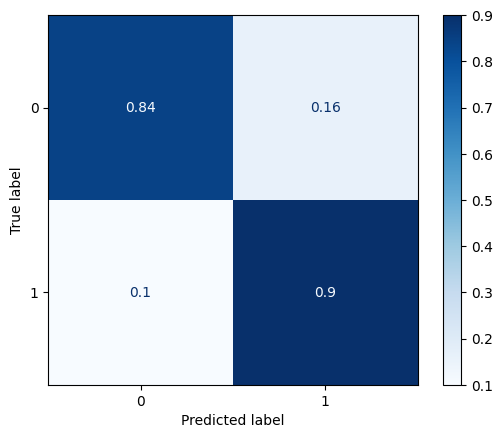

In [45]:
ConfusionMatrixDisplay.from_estimator(xgb_adjusted, x_test, y_test, cmap='Blues', normalize='true')

# Pipeline

In [47]:
pipeline_xgb = Pipeline(
    [
        ('xgboost', xgb.XGBClassifier()),
    ]
)

In [48]:
xgb_param_grid_pipeline = {
    'xgboost__learning_rate': [0.1, 0.2, 0.3],
    'xgboost__max_depth': [2, 5, 10],
    'xgboost__colsample_bytree': [0.1, 0.5, 1],
    'xgboost__n_estimators': [10, 25, 50]
}

In [49]:
grid_search_cv_pipeline = GridSearchCV(estimator=pipeline_xgb, param_grid=xgb_param_grid_pipeline,
                                       scoring='accuracy', cv=4, verbose=1)

In [50]:
grid_search_cv_pipeline.fit(x, y)

Fitting 4 folds for each of 81 candidates, totalling 324 fits


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('xgboost',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      importance_type=None,
                                                      interaction_constrain...
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             param_grid={'xgboost__colsample_bytree': [0.1, 0.5, 1],
                         'xgboost__learning_rate': [0.1, 0.2, 0.3],
                         'xgboost__max_depth': [2, 5, 10],
                         'xgboost__n_estimators': [10, 25, 50]},
             scoring='accuracy', verbose=1)

In [51]:
grid_search_cv_pipeline.best_score_

0.855684811237928

In [55]:
print(grid_search_cv_pipeline.best_estimator_)

Pipeline(steps=[('xgboost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.1, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.3,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=2, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=50, n_

In [56]:
grid_search_cv_pipeline.best_params_

{'xgboost__colsample_bytree': 0.1,
 'xgboost__learning_rate': 0.3,
 'xgboost__max_depth': 2,
 'xgboost__n_estimators': 50}

In [58]:
joblib.dump(grid_search_cv_pipeline, 'pipeline_model.pkl')

['pipeline_model.pkl']

---

In [59]:
model = joblib.load('pipeline_model.pkl')

In [64]:
new_patients = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/classificacao_xgboost/main/Dados/pacientes_novos.csv')
new_patients

,Idade,Sexo,Tipo dor,Pressao arterial,Colesterol,Glicemia jejum >120,Resultados ECG,Frequencia cardiaca max,Dor exercicio,Depressao ST,Inclinacao ST,Numero vasos fluro,Teste cintilografia
0,41,1,4,110,172,0,2,158,0,0.0,1,0,7
1,45,0,4,102,265,0,2,122,0,0.6,2,0,3
2,50,1,3,130,246,1,2,173,0,0.0,1,3,3
3,52,0,4,100,248,0,2,122,0,1.0,2,0,3
4,54,0,3,110,214,0,0,158,0,1.6,2,0,3
5,70,0,1,140,239,0,0,151,0,1.8,1,2,3
6,42,0,4,132,341,1,2,136,1,3.0,2,0,7
7,34,0,1,150,283,1,2,162,0,1.0,1,0,3
8,52,1,1,118,186,0,2,190,0,0.0,2,0,6
9,35,1,4,112,245,0,0,150,0,1.0,2,2,3


In [65]:
predicts = model.predict(new_patients)
predicts

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [66]:
probabilities = model.predict_proba(new_patients)
probabilities

array([[0.5956521 , 0.4043479 ],
       [0.88647896, 0.11352106],
       [0.70129645, 0.29870355],
       [0.866709  , 0.133291  ],
       [0.9540825 , 0.04591753],
       [0.8437761 , 0.15622388],
       [0.4617749 , 0.5382251 ],
       [0.91072744, 0.08927257],
       [0.8482884 , 0.15171158],
       [0.13766897, 0.86233103]], dtype=float32)

In [77]:
df_new_patients = new_patients.copy()
df_new_patients['Predictions'] = predicts
df_new_patients['Predictions'] = df_new_patients['Predictions'].astype(str)
df_new_patients['Predictions'] = df_new_patients['Predictions'].map({'0': 'No', '1': 'Yes'})
df_new_patients

,Idade,Sexo,Tipo dor,Pressao arterial,Colesterol,Glicemia jejum >120,Resultados ECG,Frequencia cardiaca max,Dor exercicio,Depressao ST,Inclinacao ST,Numero vasos fluro,Teste cintilografia,Predictions
0,41,1,4,110,172,0,2,158,0,0.0,1,0,7,No
1,45,0,4,102,265,0,2,122,0,0.6,2,0,3,No
2,50,1,3,130,246,1,2,173,0,0.0,1,3,3,No
3,52,0,4,100,248,0,2,122,0,1.0,2,0,3,No
4,54,0,3,110,214,0,0,158,0,1.6,2,0,3,No
5,70,0,1,140,239,0,0,151,0,1.8,1,2,3,No
6,42,0,4,132,341,1,2,136,1,3.0,2,0,7,Yes
7,34,0,1,150,283,1,2,162,0,1.0,1,0,3,No
8,52,1,1,118,186,0,2,190,0,0.0,2,0,6,No
9,35,1,4,112,245,0,0,150,0,1.0,2,2,3,Yes
